In [35]:
# Libraries

% matplotlib inline
import datetime
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import scipy as sp

from sklearn import linear_model
from sklearn.metrics import r2_score

In [36]:
df = pd.read_csv('/Users/Tamara/Desktop/Project 3/Iowa_Liquor_sales_sample_10pct.csv')

In [37]:
df.head()
df.tail()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
270950,12/22/2015,4057,DES MOINES,50316,77.0,Polk,1022100.0,TEQUILA,410,88291,Patron Tequila Silver Mini,300,$20.30,$30.45,4,$121.80,1.20,0.32
270951,11/04/2015,5151,IDA GROVE,51445,47.0,Ida,1011200.0,STRAIGHT BOURBON WHISKIES,259,17956,Evan Williams Str Bourbon,750,$7.47,$11.21,3,$33.63,2.25,0.59
270952,10/20/2015,5152,WATERLOO,50702,7.0,Black Hawk,1011300.0,TENNESSEE WHISKIES,85,26826,Jack Daniels Old #7 Black Lbl,750,$15.07,$22.61,6,$135.66,4.50,1.19
270953,11/20/2015,3562,WEST BURLINGTON,52655,29.0,Des Moines,1082900.0,MISC. IMPORTED CORDIALS & LIQUEURS,192,65258,Jagermeister Liqueur,1750,$26.05,$39.08,6,$234.48,10.50,2.77
270954,01/27/2015,4446,URBANDALE,50322,77.0,Polk,1031080.0,VODKA 80 PROOF,260,37993,Smirnoff Vodka 80 Prf,200,$2.75,$4.13,8,$33.04,1.60,0.42


In [38]:
df['State Bottle Cost'] = [dollars.strip('$') for dollars in df['State Bottle Cost']]
df['State Bottle Retail'] = [dollars.strip('$') for dollars in df['State Bottle Retail']]
df['Sale (Dollars)'] = [dollars.strip('$') for dollars in df['Sale (Dollars)']]

In [39]:
df['Date']=pd.to_datetime(df['Date'], infer_datetime_format=True)

df['State Bottle Cost'] = pd.to_numeric(df['State Bottle Cost'], errors='coerce')
df['State Bottle Retail'] = pd.to_numeric(df['State Bottle Retail'], errors='coerce')
df['Sale (Dollars)'] = pd.to_numeric(df['Sale (Dollars)'], errors='coerce')
df['Zip Code'] = pd.to_numeric(df['Zip Code'], errors='coerce')
df['County Number'] = pd.to_numeric(df['County Number'], errors='coerce')
df['Store Number'] = pd.to_numeric(df['Store Number'], errors='coerce')

In [40]:
df.sort_values(by=["Bottle Volume (ml)"], inplace=True)

df.loc[df['Bottle Volume (ml)'] == 0]

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)


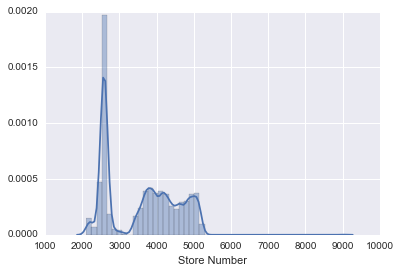

In [41]:
sns.distplot(df['Store Number'])

In [43]:
# 2015 Values

df.sort_values(by=["Store Number", "Date"], inplace=True)
start_date = pd.Timestamp("20150101")
end_date = pd.Timestamp("20151231")
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
sales_2015 = df[mask]


# Group by store name
sales_2015 = sales_2015.groupby(by=["Store Number"], as_index=False)
# Compute sums, means
sales_2015 = sales_2015.agg({"Sale (Dollars)": [np.sum, np.mean],
                   "Volume Sold (Liters)": [np.sum, np.mean],
                   "Margin": np.mean,
                   "Price per Liter": np.mean,
                   "Zip Code": lambda x: x.iloc[0], # just extract once, should be the same
                   "City": lambda x: x.iloc[0],
                   "County Number": lambda x: x.iloc[0]})
# Collapse the column indices
sales_2015.columns = [' '.join(col).strip() for col in sales_2015.columns.values]
# Rename columns

sales_2015.columns = ['store_number','city','2015_sales_sum','2015_sales_mean','county_number','2015_price_per_liter_mean'
                     ,'zip_code','2015_volume_sold_liters_sum','2015_volume_sold_liters_mean','2015_margin_mean']

# Quick check
sales_2015.head()

KeyError: 'Price per Liter'